# Project 3. Limited time training

 In project 3, you're going to improve your network under the limitation of time, specifically 10 minutes. You can borrow any structure that you consider viable, but pretrained models are **NOT allowed**.

**Hint**: Most of the popular networks can't converge in 10 minutes, so if you decide to borrow any, you'd have to trim the network a little to fit into the time frame.

## 1. Preparation

This project is time limited, we need to make sure that your hardwares are exactly the same, try the following code, if you see 'GPU correct, proceed.', you can continue the project, otherwise, click the dropdown at the upper right corner besides the status bar (RAM, Disk), and go to 'Manage sessions', and terminate the current session, then reconnect, and try the code again, repeat until you see the right message.

In [1]:
!if [ $(nvidia-smi | grep -c 'Tesla T4') -gt 0 ]; then echo "GPU correct, proceed."; else echo "GPU incorrect, please terminate this session and reconnect again."; fi

GPU correct, proceed.


## 2. Before training

For dataset, we continue to use CIFAR10, in this part, you can configure all of your settings, including data augmentation, model structure, optimizer etc., but don't put any major calculation part in.

### 2.1 Dataset

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
import numpy as np
import torchvision.transforms as transforms

cifar10_train = torchvision.datasets.CIFAR10("CIFAR10", train=True, transform=lambda x: np.array(x, dtype=np.float32).transpose(2,0,1),
                                         target_transform=None, download=True)
cifar10_test = torchvision.datasets.CIFAR10("CIFAR10", train=False, transform=lambda x: np.array(x, dtype=np.float32).transpose(2,0,1),
                                         target_transform=None, download=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 80023636.13it/s]


Extracting CIFAR10/cifar-10-python.tar.gz to CIFAR10
Files already downloaded and verified


### 2.2 Model

**Hint**: Even though pretrained models are not allowed in your final version, you can use pretrained models to determine how well the structure CAN perform and use this as part of your analysis as to determining network structure.

**Model definition**

In [3]:
import torchvision.models

import torch
import torch.nn as nn
import torch.nn.functional as F

'''
The model is originally from InceptionResNetV2
from https://github.com/Cadene/pretrained-models.pytorch/tree/8aae3d8f1135b6b13fed79c1d431e3449fdbf6e0
I learnt from this network then use their theory to create my classification network.
'''

class BasicConv2d(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, stride, padding=0):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
        self.bn = nn.BatchNorm2d(out_planes, eps=0.001, momentum=0.1, affine=True)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class MyNet(nn.Module):
    def __init__(self, num_classes=10):
        super(MyNet, self).__init__()
        self.conv2d_1a = BasicConv2d(3, 32, kernel_size=3, stride=1, padding=0)
        self.conv2d_2a = BasicConv2d(32, 32, kernel_size=3, stride=1, padding=0)
        self.conv2d_2b = BasicConv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.maxpool_3a = nn.MaxPool2d(3, stride=2)
        self.conv2d_3b = BasicConv2d(64, 80, kernel_size=1, stride=1)
        self.conv2d_4a = BasicConv2d(80, 192, kernel_size=3, stride=1)
        self.maxpool_5a = nn.MaxPool2d(3, stride=2)
        self.mixed_5b = BasicConv2d(192, 256, kernel_size=1, stride=1)  # Simplified Mixed Block
        self.repeat = nn.Sequential(*[BasicConv2d(256, 256, kernel_size=1, stride=1) for _ in range(5)])  # Reduced repetition
        self.mixed_6a = BasicConv2d(256, 384, kernel_size=3, stride=2)
        self.avgpool_1a = nn.AdaptiveAvgPool2d((1, 1))
        self.last_linear = nn.Linear(384, num_classes)

    def forward(self, x):
        x = self.conv2d_1a(x)
        x = self.conv2d_2a(x)
        x = self.conv2d_2b(x)
        x = self.maxpool_3a(x)
        x = self.conv2d_3b(x)
        x = self.conv2d_4a(x)
        x = self.maxpool_5a(x)
        x = self.mixed_5b(x)
        x = self.repeat(x)
        x = self.mixed_6a(x)
        x = self.avgpool_1a(x)
        x = x.view(x.size(0), -1)
        x = self.last_linear(x)
        return x



device = torch.device("cuda" if torch.cuda.is_available() else "mps")
net = MyNet().to(device)

'''
This network takes time to converge, reach its maximum precision and show its performance. So I need to simplify it in this assignment
'''

'\nThis network takes time to converge, reach its maximum precision and show its performance. So I need to simplify it in this assignment\n'

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

class BasicConv2d(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, stride, padding=0):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
        self.bn = nn.BatchNorm2d(out_planes, eps=0.001, momentum=0.1, affine=True)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class ImprovedNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ImprovedNet, self).__init__()
        self.conv2d_1a = BasicConv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2d_2a = BasicConv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv2d_2b = BasicConv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.maxpool_3a = nn.MaxPool2d(2, stride=2)
        self.conv2d_3b = BasicConv2d(128, 192, kernel_size=3, stride=1, padding=1)
        self.conv2d_4a = BasicConv2d(192, 256, kernel_size=3, stride=1, padding=1)
        self.maxpool_5a = nn.MaxPool2d(2, stride=2)
        self.mixed_5b = BasicConv2d(256, 320, kernel_size=1, stride=1)
        self.mixed_6a = BasicConv2d(320, 384, kernel_size=3, stride=2)
        self.avgpool_1a = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.5)
        self.last_linear = nn.Linear(384, num_classes)

    def forward(self, x):
        x = self.conv2d_1a(x)
        x = self.conv2d_2a(x)
        x = self.conv2d_2b(x)
        x = self.maxpool_3a(x)
        x = self.conv2d_3b(x)
        x = self.conv2d_4a(x)
        x = self.maxpool_5a(x)
        x = self.mixed_5b(x)
        x = self.mixed_6a(x)
        x = self.avgpool_1a(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.last_linear(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = ImprovedNet().to(device)


**Analysis tools**

In [5]:
def testset_precision(net, testset):
    net.eval()
    dl = DataLoader(testset, batch_size=512)
    total_count = 0
    total_correct = 0
    for data in dl:
        inputs = data[0].to(device)
        targets = data[1].to(device)
        outputs = net(inputs)
        predicted_labels = outputs.argmax(dim=1)
        comparison = predicted_labels == targets
        total_count += predicted_labels.size(0)
        total_correct += comparison.sum()
    net.train()

    return int(total_correct) / int(total_count)

print(f'Inital precision: {testset_precision(net, cifar10_test)}')

from IPython import display
import matplotlib.pyplot as plt
import time

class DrawingBoard:
    def __init__(self, names, time_slot=60):
        self.start_time = time.time()
        self.time_slot = time_slot
        self.annotations = []
        self.data = {}
        for name in names:
            self.data[name] = []

    def update(self, data_dict):
        for key in data_dict:
            self.data[key].append(data_dict[key])
        current_time = time.time() - self.start_time
        idx = len(self.data[key]) -1
        if len(self.annotations) == 0:
            if current_time > self.time_slot:
                self.annotations.append((idx, current_time))
        elif current_time - (self.annotations[-1][1]//self.time_slot)*self.time_slot > self.time_slot:
            self.annotations.append((idx, current_time))

    def draw(self):
        all_keys = list(self.data.keys())
        fig, ax = plt.subplots(nrows=1, ncols=len(all_keys))
        fig.set_figwidth(20)
        for idx in range(len(all_keys)):
            ax[idx].plot(self.data[all_keys[idx]])
            ax[idx].set_title(all_keys[idx])
            for an in self.annotations:
                ax[idx].annotate(f'{int(an[1])}s', xy=(an[0], self.data[all_keys[idx]][an[0]]),
                    xytext=(0, -40), textcoords="offset points",
                    va="center", ha="left",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
        display.clear_output(wait=True)
        plt.show()

Inital precision: 0.0998


In [6]:
# modify as you need
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.003)
dataloader = DataLoader(cifar10_train, batch_size=256, shuffle=True)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(dataloader), epochs=20) # a scheduler to improve performance in short time

## 3. Start Training

This is the training part, take advantage of everything you know. In addition to the tips last time, you can also consider data augmentation, short cut structure in ResNet etc.

Basically at this point, nothing is limited except time and pretrained models.

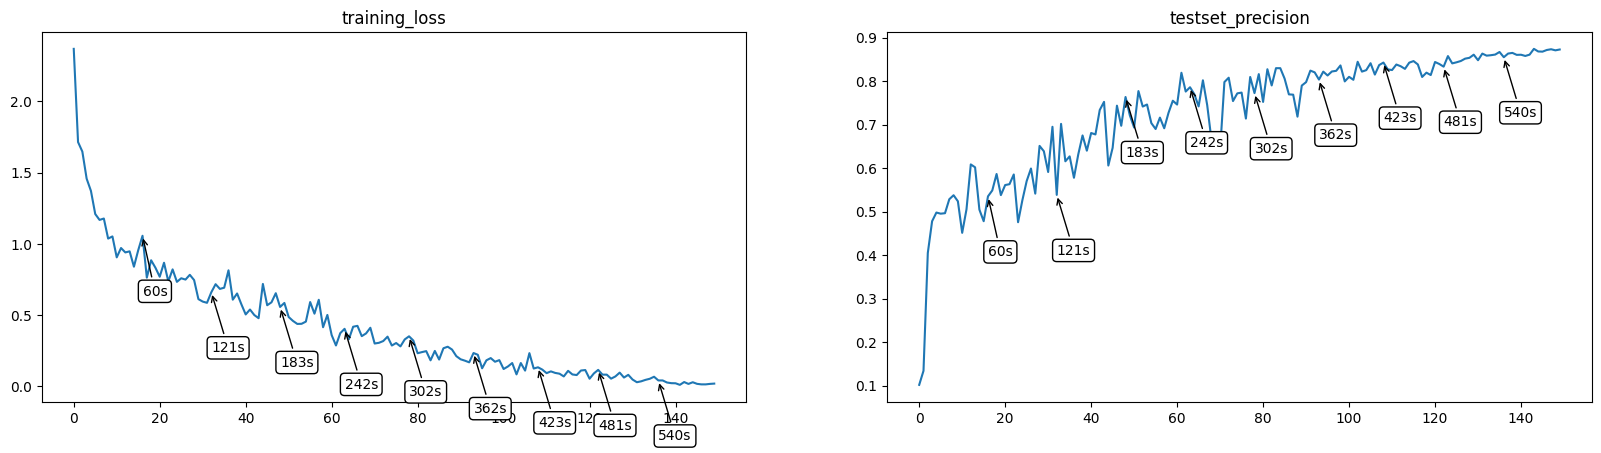

Time's up finished


In [7]:
# modify as you need
import time
import signal
class TimeLimitation:
    def __init__(self, limit):
        self.limit = limit

    def __enter__(self):
        def handler(signum, frame):
            raise NotImplementedError('Time\'s up')
        signal.signal(signal.SIGALRM, handler)
        signal.alarm(self.limit)

    def __exit__(self, exc_type, exc_val, exc_tb):
        signal.alarm(0)

try:
  with TimeLimitation(600): # don't forget the indentation
      print('start training')
      db = DrawingBoard(['training_loss', 'testset_precision'], time_slot=60)
      for epoch in range(1000):
          for iter, data in enumerate(dataloader):
              inputs = data[0].to(device)
              targets = data[1].to(device)
              outputs = net(inputs)

              optimizer.zero_grad()
              loss = criterion(outputs, targets)
              loss.backward()
              optimizer.step()
              scheduler.step()

              if iter % 20 == 0:
                  db.update({'training_loss':loss.item(), 'testset_precision': testset_precision(net, cifar10_test)})
                  db.draw()
except NotImplementedError as e:
  print(e, 'finished')
  exit()

# Marking Scheme

*   Code implementation: 30%


> * Successfully run through the whole project: 10%
> * Code implementation quality: 20% (including performance)

*   PDF report: 50%

> * Overview, introduction to the network structure etc.: 10%
> * In-depth analysis and improvements: 40%

*   Presentation: 20%

> * Overall demonstration: 10%
> * Unfolding analysis: 10%